In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from pandas import ExcelFile

In [5]:
df = pd.read_excel('DIG Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,21270.5,21024.6,21311.5,20819.7,4.47M,0.0117
1,2021-07-02,20901.6,21393.4,21393.4,20901.6,4.95M,-0.0173
2,2021-07-05,20409.8,20901.6,20942.6,20327.9,5.82M,-0.0235
3,2021-07-06,19016.4,20491.8,20491.8,19016.4,7.45M,-0.0683
4,2021-07-07,18442.6,18770.5,19016.4,17909.8,7.13M,-0.0302


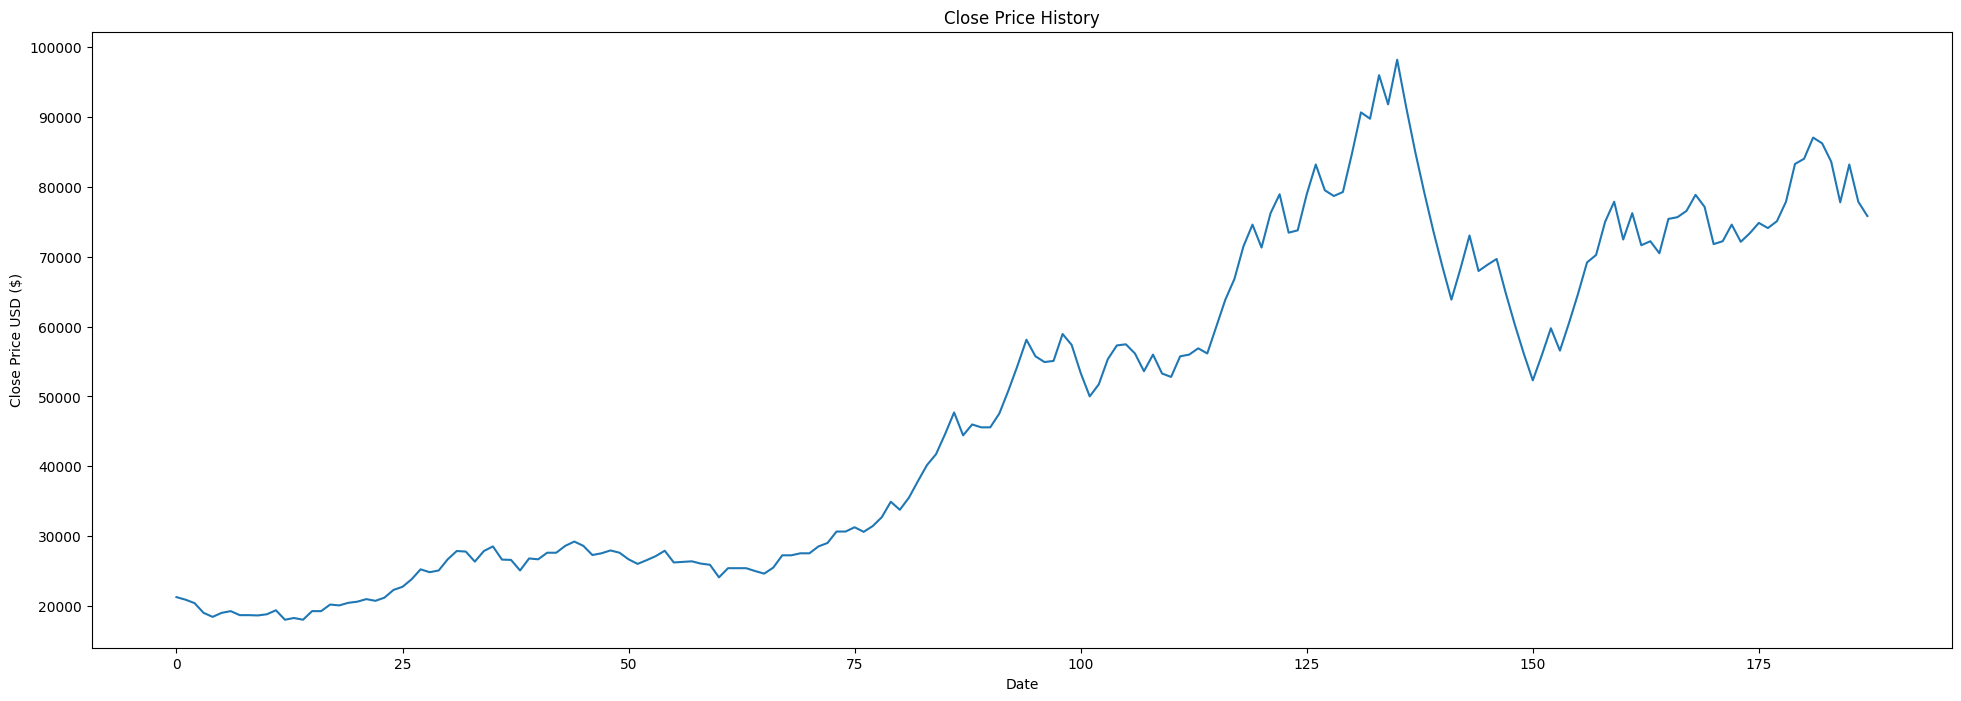

In [6]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 59)

training_data_len

129

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0403885 ],
       [0.03578668],
       [0.02965175],
       [0.01226986],
       [0.00511203],
       [0.01226986],
       [0.01533733],
       [0.00817949],
       [0.00817949],
       [0.00766804],
       [0.00971385],
       [0.01687044],
       [0.        ],
       [0.00306747],
       [0.        ],
       [0.01533733],
       [0.01533733],
       [0.02709574],
       [0.02556263],
       [0.0301632 ],
       [0.03220776],
       [0.03680959],
       [0.03374212],
       [0.0393656 ],
       [0.05316982],
       [0.0587933 ],
       [0.07208606],
       [0.0899794 ],
       [0.08486738],
       [0.08793484],
       [0.10787275],
       [0.12269862],
       [0.12167696],
       [0.10378362],
       [0.12269862],
       [0.13087936],
       [0.10736129],
       [0.10685109],
       [0.08793484],
       [0.1094071 ],
       [0.10787275],
       [0.11963116],
       [0.11963116],
       [0.13190227],
       [0.13957031],
       [0.13190227],
       [0.11554203],
       [0.118

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0403885 , 0.03578668, 0.02965175, 0.01226986, 0.00511203,
       0.01226986, 0.01533733, 0.00817949, 0.00817949, 0.00766804,
       0.00971385, 0.01687044, 0.        , 0.00306747, 0.        ,
       0.01533733, 0.01533733, 0.02709574, 0.02556263, 0.0301632 ,
       0.03220776, 0.03680959, 0.03374212, 0.0393656 , 0.05316982,
       0.0587933 , 0.07208606, 0.0899794 , 0.08486738, 0.08793484,
       0.10787275, 0.12269862, 0.12167696, 0.10378362, 0.12269862,
       0.13087936, 0.10736129, 0.10685109, 0.08793484, 0.1094071 ,
       0.10787275, 0.11963116, 0.11963116, 0.13190227, 0.13957031,
       0.13190227, 0.11554203, 0.1186095 , 0.12372153, 0.11963116,
       0.10787275, 0.09969325, 0.10633964, 0.11349622, 0.12321007,
       0.10224927, 0.10327217, 0.10429383, 0.10020471, 0.0981589 ])]
[0.07566498136941943]

[array([0.0403885 , 0.03578668, 0.02965175, 0.01226986, 0.00511203,
       0.01226986, 0.01533733, 0.00817949, 0.00817949, 0.00766804,
       0.00971385, 0.01687044, 0.  

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
69/69 [==============================] - 3s 13ms/step - loss: 0.0209
Epoch 2/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 3/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 4/25
69/69 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 5/25
69/69 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 6/25
69/69 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 7/25
69/69 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 8/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 9/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 10/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 11/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 12/25
69/69 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 13/25
69/69 [==================

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 16ms/step


6542.043918005004

C:\Users\DELL\AppData\Local\Temp\ipykernel_47968\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


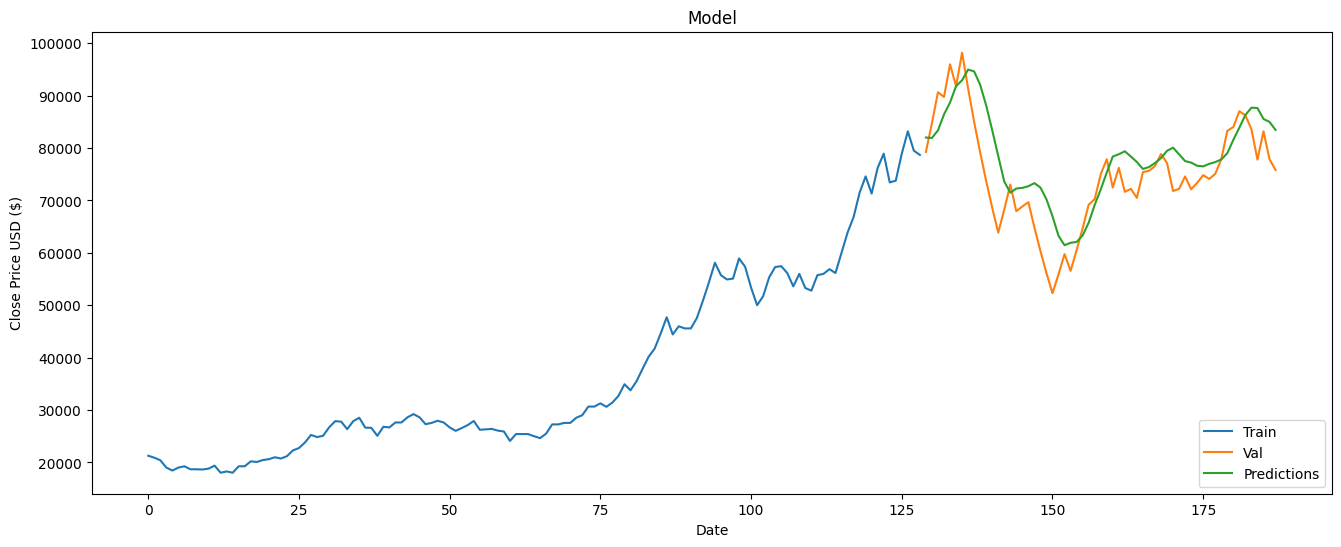

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()